<a href="https://colab.research.google.com/github/NikFloden/Art-Style-Transfer-Using-Neural-Networks/blob/main/Milestone_2_Understanding_What_Convolutional_Neural_Networks_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding What Convolutional Neural Networks Learn
**Objective**

*   Load the trained CNN and understand what exactly it’s learning.

**Importance to project**

*   Understand the abilities of the trained CNN model to understand not only the way to build better models but also the model’s weaknesses and strengths.

*  Learn how to view misclassified samples, which will help to understand that CNNs are not infallible and give some intuition into how they work.

* Learn to display the feature maps that are output by various convolution and pooling layers in a network, given certain input into your trained CNN.

**Workflow**


1.   Load the trained MNIST model from Milestone 1.
2.   Analyze the model’s performance by viewing the confusion matrix and  classification report.
  *   Closely examine the performance metrics of the trained CNN and identify its weaknesses.
  *  Look closely at the individual performance of each class and note the classes the CNN has trouble classifying correctly.
3.  Identify all samples wrongly classified by the CNN and display them.

Observe this data and intuitively think about why the CNN misclassified them.
4.  Extract the layer outputs and create the activation layer model so you can visualize the activations of each layer.

This requires you to give the CNN a certain input, such as an image from your test dataset.
5.  Display the output shape of the first layer activation and compare it with the output layer shape that can be seen from displaying the model summary.
6.  Show the output of the activation map of the fourth convolution filter or feature map in the first convolution layer.
7.  Display all the activations for the first three layers of your model (in other words–the two convolution layers and the max-pooling layer).




## 1.  Loading the Model

In [2]:
from tensorflow.keras.models import load_model
model = load_model("mnist_simple_cnn_10_Epochs.h5")

Gotta reload the dataset as well

In [3]:
from tensorflow.keras.datasets import mnist

# Loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

##2.  Analyzing the model's performance
###The confusion matrix
Let's do it to the nines.

Confusion matrix:
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    2    1    0    0    1    0    2    0]
 [   2    0 1023    0    1    0    0    4    2    0]
 [   0    0    0  995    0    6    0    2    7    0]
 [   0    0    0    0  974    0    5    0    2    1]
 [   3    0    0    5    0  876    2    0    4    2]
 [   6    3    0    0    1    1  944    0    3    0]
 [   1    3    9    0    0    0    0 1011    3    1]
 [   5    0    1    0    0    0    1    3  964    0]
 [   4    5    0    0    7    0    0    7    8  978]]


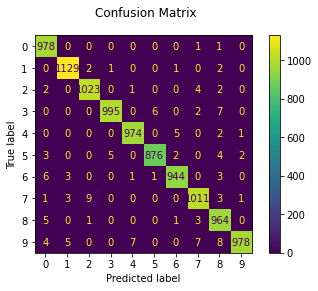

In [4]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1) #
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

It looks like our model currently has a little trouble classifying 0s and 8s correctly. Especially 8s. Let's look at the classification report.

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##3. Finding the wrong prediction cases


128


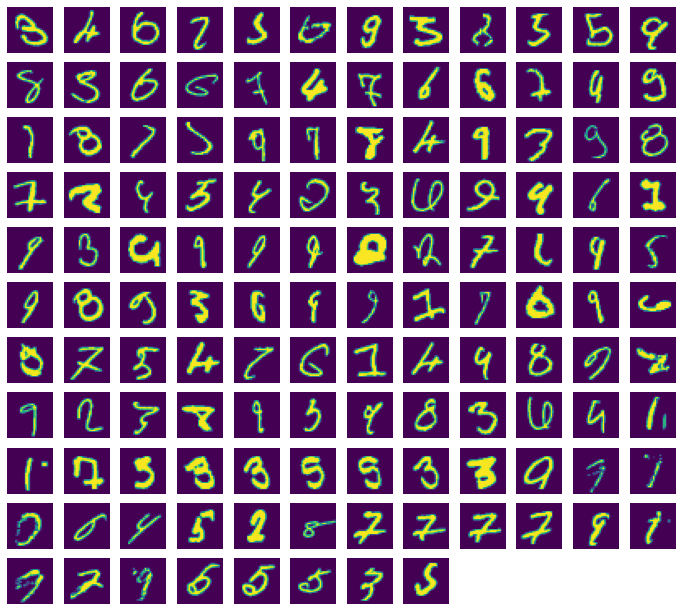

In [6]:
wrongs_idx = np.absolute(y_test - y_pred) #this helps find the indexes
wrongs = []
#np.where(x_test) for x in wrongs_idx if x != 0 I initially wanted to use a list comprehension, but I couldn't really figure it out specific for the idx
for i in range(len(wrongs_idx)):
  if wrongs_idx[i] != 0:
    wrongs.append(x_test[i])

print(len(wrongs)) #so out of 10k we have 128 wrong classifications

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,12))
ind = 1
for i in range(128):
    figure.add_subplot(12,12, ind)
    plt.imshow(wrongs[i],cmap="viridis")
    plt.axis("off")
    ind += 1

Looking at these datapoints, it's understandable why the network is having a hard time classifying the majority of them. Plenty are confusingly written. You can also see the line of 7s on the second to last row that all have the tock marks.
##4. Extracting the layer outputs and creating the activation model

In [7]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:7]] #gotta skim off 7 layers of our 8 layer model
# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

##5. Display the output shape of the first layer activation
Not sure which input that we'll want to see, so I'll randomly select one of our test digits.

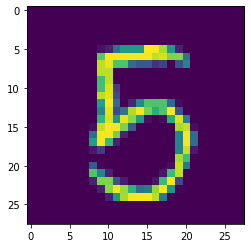

In [8]:
np.random.seed(262022) #set the seed and make it repeatable
random_idx = np.random.randint(0,len(x_test))
input_sample = x_test[random_idx]
plt.imshow(input_sample,cmap="viridis")

So our sample will be a pretty nice 5. Now onto the activation model. 

In [9]:
activations = activation_model.predict(x_test)

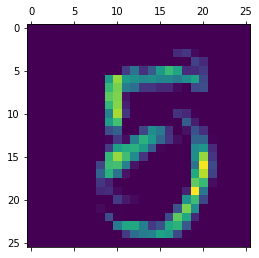

In [25]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[random_idx, :, :, 0], cmap='viridis')

Let's look at the shape vs the output shape.

In [19]:
print(first_layer_activation[random_idx].shape)
print(model.summary())

(26, 26, 32)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                           

Checks out, the first layer has a shape of (26,26,32) and the output shape is (none, 26, 26, 32).
Let's go a little bit above and beyond by getting the entire first layer activation:

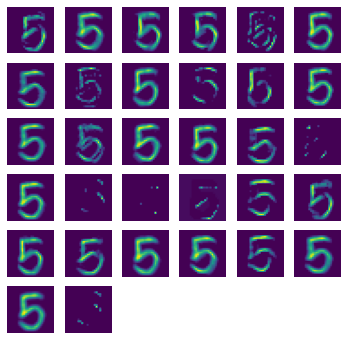

In [52]:
figure2 = plt.figure(figsize=(6,6))

for i in range(32):
    figure2.add_subplot(6,6, i+1)
    plt.imshow(first_layer_activation[random_idx, :, :, i])
    plt.axis("off")

##6.  Show the output of the activation map of the fourth convolution filter or feature map in the first convolution layer.

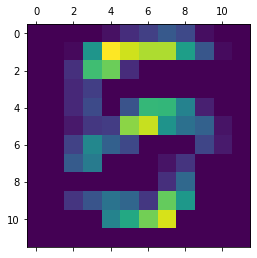

In [23]:
fourth_layer_activation = activations[3]
fourth_layer_activation[random_idx].shape
plt.matshow(fourth_layer_activation[random_idx, :, :, 4], cmap='viridis')